In [294]:
import pandas as pd
import numpy as np

In [295]:
df = pd.read_csv('wheat_coffee_corn_prizes.csv')

In [296]:
df.head()

,Date,Wheat,Coffe,Corn
0,8/20/1973,5.085,0.6735,3.115
1,8/21/1973,5.285,0.6710,3.015
2,8/22/1973,5.085,0.6580,2.915
3,8/23/1973,5.005,0.6675,2.815
4,8/24/1973,5.180,0.6660,2.900


In [297]:
df.drop(columns=['Wheat', 'Corn'], axis=1, inplace=True)

In [298]:
df.shape

(12539, 2)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12539 entries, 0 to 12538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12539 non-null  object 
 1   Coffe   12539 non-null  float64
dtypes: float64(1), object(1)
memory usage: 196.1+ KB


In [300]:
df['Date'] = pd.to_datetime(df['Date'])

In [301]:
df['Date'].min(), df['Date'].max()

(Timestamp('1973-08-20 00:00:00'), Timestamp('2023-09-05 00:00:00'))

In [302]:
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month

In [303]:
df.isna().sum()

Date     0
Coffe    0
Ano      0
Mes      0
dtype: int64

In [304]:
def variacao_coluna(linha):
    if linha.name == 0:
        return 0

    else:
        return linha[1] - df.iloc[(linha.name - 1), 1]

In [305]:
df.apply(variacao_coluna, axis=1)

0        0.0000
1       -0.0025
2       -0.0130
3        0.0095
4       -0.0015
          ...  
12534    0.0204
12535   -0.0081
12536   -0.0271
12537    0.0000
12538    0.0188
Length: 12539, dtype: float64

In [306]:
df['Variacao Cafe'] = df.apply(variacao_coluna, axis=1)

In [307]:
df.head()

,Date,Coffe,Ano,Mes,Variacao Cafe
0,1973-08-20,0.6735,1973,8,0.0000
1,1973-08-21,0.6710,1973,8,-0.0025
2,1973-08-22,0.6580,1973,8,-0.0130
3,1973-08-23,0.6675,1973,8,0.0095
4,1973-08-24,0.6660,1973,8,-0.0015


In [308]:
df['Variacao Cafe'].std()

0.03165372968943535

In [309]:
df['Variacao Cafe'].median()

0.0

In [310]:
print('%f' % df['Variacao Cafe'].mean())

0.000069


In [311]:
print(df['Variacao Cafe'].min(), df['Variacao Cafe'].max())

-0.38400000000000034 0.47


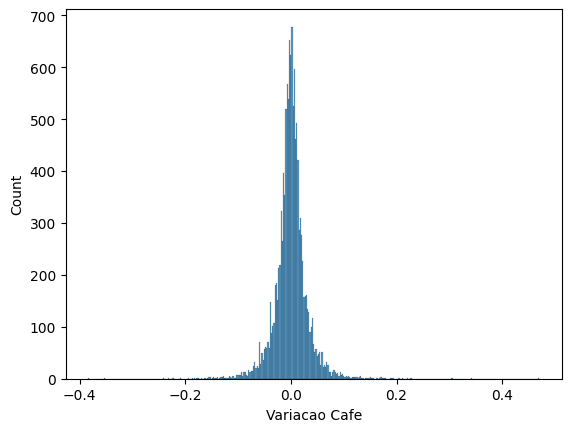

In [312]:
import seaborn as sns
sns.histplot(data=df, x='Variacao Cafe');

In [313]:
data = df['Date'].dt.year

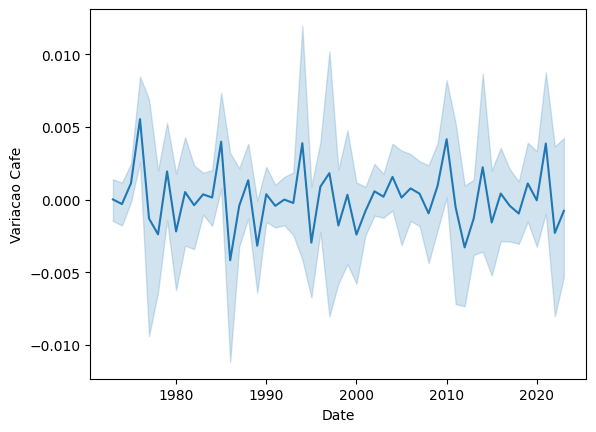

In [314]:
sns.lineplot(data=df, x=data, y='Variacao Cafe');

In [315]:
def criar_estados(linha):
    variacao = linha[4]
    if variacao < (0.000069 - 0.015):
        return 0

    elif (0.000069 - 0.015) <= variacao <= (0.000069 + 0.015):
        return 1
    
    else:
        return 2

In [316]:
df['Estados Variacao'] = df.apply(criar_estados, axis=1)

In [317]:
df.head()

,Date,Coffe,Ano,Mes,Variacao Cafe,Estados Variacao
0,1973-08-20,0.6735,1973,8,0.0000,1
1,1973-08-21,0.6710,1973,8,-0.0025,1
2,1973-08-22,0.6580,1973,8,-0.0130,1
3,1973-08-23,0.6675,1973,8,0.0095,1
4,1973-08-24,0.6660,1973,8,-0.0015,1


Desvio Padrão

In [318]:
df['Estados Variacao'].value_counts()

Estados Variacao
1    6819
0    2895
2    2825
Name: count, dtype: int64

Desvio padrão / 2

Escolhido

In [319]:
df['Estados Variacao'].value_counts()

Estados Variacao
1    6819
0    2895
2    2825
Name: count, dtype: int64

In [320]:
df['Estados Variacao'].value_counts(normalize=True)

Estados Variacao
1    0.543823
0    0.230880
2    0.225297
Name: proportion, dtype: float64

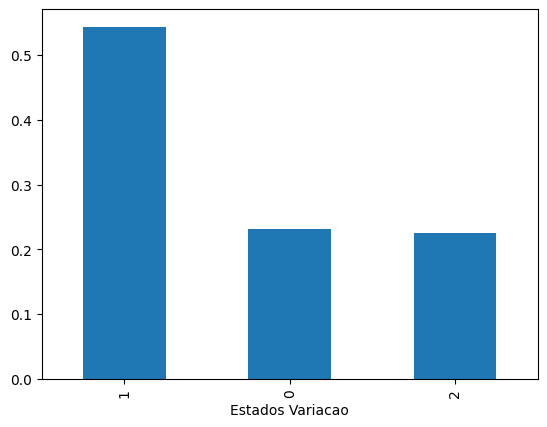

In [321]:
df['Estados Variacao'].value_counts(normalize=True).plot(kind='bar');

### Criando a matriz de transições

In [322]:
transitions = df['Estados Variacao'].to_list()
transitions

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 2,


In [323]:
df2 = pd.DataFrame(transitions)
df2

,0
0,1
1,1
2,1
3,1
4,1
...,...
12534,2
12535,1
12536,0
12537,1


In [324]:
df2['shift'] = df2[0].shift(-1)
df2

,0,shift
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
12534,2,1.0
12535,1,0.0
12536,0,1.0
12537,1,2.0


In [325]:
trans_mat = df2.groupby([0, 'shift']).value_counts().unstack().fillna(0)
trans_mat

shift,0.0,1.0,2.0
0,,,
0,804,1340,751
1,1317,4233,1269
2,774,1245,805


In [191]:
trans_mat = trans_mat.div(trans_mat.sum(axis=1), axis=0).values
# essa é a matriz que precisa ser multiplicada
trans_mat

array([[0.27772021, 0.46286701, 0.25941278],
       [0.19313682, 0.62076551, 0.18609767],
       [0.27407932, 0.44086402, 0.28505666]])

Fazer previsões por mês

In [192]:
np.matmul((0, 1, 0), trans_mat)

array([0.19313682, 0.62076551, 0.18609767])

In [193]:
df

,Date,Coffe,Ano,Mes,Variacao Cafe,Estados Variacao
0,1973-08-20,0.6735,1973,8,0.0000,1
1,1973-08-21,0.6710,1973,8,-0.0025,1
2,1973-08-22,0.6580,1973,8,-0.0130,1
3,1973-08-23,0.6675,1973,8,0.0095,1
4,1973-08-24,0.6660,1973,8,-0.0015,1
...,...,...,...,...,...,...
12534,2023-08-30,1.5512,2023,8,0.0204,2
12535,2023-08-31,1.5431,2023,8,-0.0081,1
12536,2023-09-01,1.5160,2023,9,-0.0271,0
12537,2023-09-04,1.5160,2023,9,0.0000,1


In [194]:
df3 = df.groupby(['Ano', 'Mes'])['Estados Variacao'].value_counts().unstack().fillna(0)
df3

Estados Variacao     0     1    2
Ano  Mes                         
1973 8             1.0   9.0  0.0
     9             0.0  17.0  2.0
     10            1.0  20.0  0.0
     11            1.0  18.0  1.0
     12            0.0  19.0  0.0
...                ...   ...  ...
2023 5             7.0  12.0  4.0
     6            11.0   5.0  6.0
     7             5.0  10.0  6.0
     8             7.0  11.0  5.0
     9             1.0   1.0  1.0

[602 rows x 3 columns]

In [195]:
mat_estados = df3.div(df3.sum(axis=1), axis=0)

In [196]:
mat_estados

Estados Variacao         0         1         2
Ano  Mes                                      
1973 8            0.100000  0.900000  0.000000
     9            0.000000  0.894737  0.105263
     10           0.047619  0.952381  0.000000
     11           0.050000  0.900000  0.050000
     12           0.000000  1.000000  0.000000
...                    ...       ...       ...
2023 5            0.304348  0.521739  0.173913
     6            0.500000  0.227273  0.272727
     7            0.238095  0.476190  0.285714
     8            0.304348  0.478261  0.217391
     9            0.333333  0.333333  0.333333

[602 rows x 3 columns]

In [197]:
mat_estados_valores = mat_estados.values

In [198]:
mat_estados_valores

array([[0.1       , 0.9       , 0.        ],
       [0.        , 0.89473684, 0.10526316],
       [0.04761905, 0.95238095, 0.        ],
       ...,
       [0.23809524, 0.47619048, 0.28571429],
       [0.30434783, 0.47826087, 0.2173913 ],
       [0.33333333, 0.33333333, 0.33333333]])

In [199]:
previsoes = np.matmul(mat_estados_valores, trans_mat)

In [200]:
previsoes

array([[0.20159516, 0.60497566, 0.19342918],
       [0.20165709, 0.60182851, 0.1965144 ],
       [0.1971646 , 0.61324653, 0.18958886],
       ...,
       [0.23640215, 0.5317702 , 0.23182764],
       [0.23647579, 0.53360043, 0.22992379],
       [0.24831212, 0.50816551, 0.24352237]])

In [201]:
np.matmul([0.1       , 0.9       , 0.        ], trans_mat)

array([0.20159516, 0.60497566, 0.19342918])

In [202]:
mat_estados['estados'] = [str(linha) for linha in mat_estados_valores]
mat_estados['previsoes'] = [str(linha) for linha in previsoes]

In [203]:
# mat_estados.estados = mat_estados.estados.str[1:-1].split()
# mat_estados.previsoes = mat_estados.previsoes.str[1:-1]

In [204]:
# mat_estados.estados = mat_estados.estados.str.strip()
# mat_estados.previsoes = mat_estados.previsoes.str.strip()

In [205]:
# mat_estados.estados = mat_estados.estados.str.replace(' ', ', ')
# mat_estados.previsoes = mat_estados.previsoes.str.replace(' ', ', ')

In [206]:
mat_estados.previsoes = mat_estados.previsoes.shift(1, fill_value=0)

In [207]:
mat_estados

Estados Variacao         0         1         2  \
Ano  Mes                                         
1973 8            0.100000  0.900000  0.000000   
     9            0.000000  0.894737  0.105263   
     10           0.047619  0.952381  0.000000   
     11           0.050000  0.900000  0.050000   
     12           0.000000  1.000000  0.000000   
...                    ...       ...       ...   
2023 5            0.304348  0.521739  0.173913   
     6            0.500000  0.227273  0.272727   
     7            0.238095  0.476190  0.285714   
     8            0.304348  0.478261  0.217391   
     9            0.333333  0.333333  0.333333   

Estados Variacao                             estados  \
Ano  Mes                                               
1973 8                                 [0.1 0.9 0. ]   
     9            [0.         0.89473684 0.10526316]   
     10           [0.04761905 0.95238095 0.        ]   
     11                             [0.05 0.9  0.05]   
     12                                   [0. 1. 0.]   
...                                              ...   
2023 5            [0.30434783 0.52173913 0.17391304]   
     6            [0.5        0.22727273 0.27272727]   
     7            [0.23809524 0.47619048 0.28571429]   
     8            [0.30434783 0.47826087 0.2173913 ]   
     9            [0.33333333 0.33333333 0.33333333]   

Estados Variacao                           previsoes  
Ano  Mes                                              
1973 8                                             0  
     9            [0.20159516 0.60497566 0.19342918]  
     10           [0.20165709 0.60182851 0.1965144 ]  
     11           [0.1971646  0.61324653 0.18958886]  
     12           [0.20141312 0.60387551 0.19471137]  
...                                              ...  
2023 5            [0.26026793 0.48284667 0.25688539]  
     6            [0.23295655 0.54142223 0.22562122]  
     7            [0.25750374 0.49275222 0.24974404]  
     8            [0.23640215 0.5317702  0.23182764]  
     9            [0.23647579 0.53360043 0.22992379]  

[602 rows x 5 columns]

In [337]:
from math import pow
from scipy.special import gamma

In [258]:
qui_quadrado = np.power(mat_estados_valores - previsoes, 2) / previsoes

In [259]:
qui_quadrado

array([[5.11995270e-02, 1.43872503e-01, 1.93429180e-01],
       [2.01657086e-01, 1.42557705e-01, 4.23724152e-02],
       [1.13427425e-01, 1.87546360e-01, 1.89588864e-01],
       ...,
       [1.21256950e-05, 5.80909966e-03, 1.25255559e-02],
       [1.94802761e-02, 5.73925040e-03, 6.83109496e-04],
       [2.91109726e-02, 6.01502673e-02, 3.31222524e-02]])

In [336]:
qui_quadrado.sum(axis=0)

array([35.10329233, 38.57514339, 37.81176595])

In [262]:
mat_estados_valores.sum()

602.0

In [263]:
qui_quadrado

array([[5.11995270e-02, 1.43872503e-01, 1.93429180e-01],
       [2.01657086e-01, 1.42557705e-01, 4.23724152e-02],
       [1.13427425e-01, 1.87546360e-01, 1.89588864e-01],
       ...,
       [1.21256950e-05, 5.80909966e-03, 1.25255559e-02],
       [1.94802761e-02, 5.73925040e-03, 6.83109496e-04],
       [2.91109726e-02, 6.01502673e-02, 3.31222524e-02]])

In [264]:
mat_estados_valores - previsoes

array([[-0.10159516,  0.29502434, -0.19342918],
       [-0.20165709,  0.29290833, -0.09125125],
       [-0.14954556,  0.33913442, -0.18958886],
       ...,
       [ 0.00169309, -0.05557973,  0.05388664],
       [ 0.06787204, -0.05533956, -0.01253248],
       [ 0.08502122, -0.17483218,  0.08981096]])

In [267]:
(mat_estados_valores - previsoes) ** 2

array([[1.03215769e-02, 8.70393621e-02, 3.74148475e-02],
       [4.06655805e-02, 8.57952912e-02, 8.32678991e-03],
       [2.23638734e-02, 1.15012155e-01, 3.59439374e-02],
       ...,
       [2.86654040e-06, 3.08910611e-03, 2.90377013e-03],
       [4.60661363e-03, 3.06246646e-03, 1.57063122e-04],
       [7.22860723e-03, 3.05662915e-02, 8.06600936e-03]])

In [266]:
(mat_estados_valores - previsoes) ** 2/ previsoes

array([[5.11995270e-02, 1.43872503e-01, 1.93429180e-01],
       [2.01657086e-01, 1.42557705e-01, 4.23724152e-02],
       [1.13427425e-01, 1.87546360e-01, 1.89588864e-01],
       ...,
       [1.21256950e-05, 5.80909966e-03, 1.25255559e-02],
       [1.94802761e-02, 5.73925040e-03, 6.83109496e-04],
       [2.91109726e-02, 6.01502673e-02, 3.31222524e-02]])

In [273]:
mat_estados_valores_2 = np.around(mat_estados_valores * 602)
previsoes_2 = np.around(previsoes_2 * 602)

In [274]:
qui_quadrado_2 = np.power(mat_estados_valores_2 - previsoes_2, 2) / previsoes_2

In [277]:
qui_quadrado_2.sum(axis=0)

array([21142.43834064, 23230.64033235, 22795.6566838 ])

In [338]:
from scipy import stats
from scipy.special import gamma

In [335]:
stats.chisquare(df.Coffe, previsoes, ddof=0, axis=0)

Power_divergenceResult(statistic=2330.364364874831, pvalue=1.0)

In [236]:
mat_estados_valores

array([[0.1       , 0.9       , 0.        ],
       [0.        , 0.89473684, 0.10526316],
       [0.04761905, 0.95238095, 0.        ],
       ...,
       [0.23809524, 0.47619048, 0.28571429],
       [0.30434783, 0.47826087, 0.2173913 ],
       [0.33333333, 0.33333333, 0.33333333]])

In [218]:
previsao_2.sha

array([[0.20159516, 0.60497566, 0.19342918],
       [0.20165709, 0.60182851, 0.1965144 ],
       [0.1971646 , 0.61324653, 0.18958886],
       ...,
       [0.25750374, 0.49275222, 0.24974404],
       [0.23640215, 0.5317702 , 0.23182764],
       [0.23647579, 0.53360043, 0.22992379]])

In [232]:
mat_estados_valores.shape

(602, 3)

In [233]:
previsoes.shape

(602, 3)

In [341]:
k = mat_estados_valores.shape[0] - 1
x = qui_quadrado

1 / (2**(k/2) * gamma(k/2)) * x**(k/2 - 1) * np.exp(-x/2)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])